# CARDOTCOM DATA MUNGING

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')
import seaborn as sb

In [100]:
df = pd.read_csv('C:/Users/emmat/Desktop/database/cardotcom_data.csv', index_col=False)
df.head(5)

,site,car_id,car_descrip,car_make,car_model,car_trim,car_year,car_category,car_mileage,car_price,car_extColor,car_transmission,car_driveTrain,car_vendor,car_location,car_detail_link,car_img_link,Unnamed: 17,Unnamed: 18
0,carsDotCom,699097326,Used 2014 BMW M5 Base,BMW,M5,Base,2014,Used,30000,56500,NaN,NaN,NaN,Omar (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/6990...,https://www.cstatic-images.com/phototab/SIY/17...,NaN
1,carsDotCom,703358833,Used 2010 BMW X5 xDrive35d,BMW,X5,xDrive35d,2010,Used,58768,19999,NaN,NaN,NaN,David (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7033...,https://www.cstatic-images.com/phototab/SIY/88...,NaN
2,carsDotCom,704738631,Used 2008 Chrysler Sebring,Chrysler,Sebring,null,2008,Used,88000,5000,NaN,NaN,NaN,joseph (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7047...,https://www.cstatic-images.com/phototab/SIY/13...,NaN
3,carsDotCom,705384215,Used 2009 Subaru Impreza 2.5 i,Subaru,Impreza,2.5 i,2009,Used,93651,6300,NaN,NaN,NaN,Karen (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7053...,https://www.cstatic-images.com/phototab/SIY/50...,NaN
4,carsDotCom,703829198,Used 2006 Toyota Land Cruiser,Toyota,Land Cruiser,null,2006,Used,178000,15000,NaN,NaN,NaN,Erin (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7038...,https://www.cstatic-images.com/phototab/SIY/86...,NaN


In [101]:
# how many columns and rows has this data set
df.shape

(5011, 19)

# Looking for columns name

In [102]:
df.columns

Index(['site', 'car_id', 'car_descrip', 'car_make', 'car_model', 'car_trim',
       'car_year', 'car_category', 'car_mileage', 'car_price', 'car_extColor',
       'car_transmission', 'car_driveTrain', 'car_vendor', 'car_location',
       'car_detail_link', 'car_img_link', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

# Looking for missing values by columns

In [103]:
df.isnull().sum()

site                   0
car_id                 0
car_descrip            0
car_make               0
car_model            397
car_trim               0
car_year               0
car_category           0
car_mileage            0
car_price              0
car_extColor        4022
car_transmission    4022
car_driveTrain      4023
car_vendor             0
car_location           0
car_detail_link        0
car_img_link           0
Unnamed: 17            0
Unnamed: 18         5010
dtype: int64

# For this Data Set, we have 2 kinds of missing values: the NaN or empty spaces that appear in some cells and some -1 and 1 that are present in some other  cells

# Let's check how many -1 and 1 are present in the column that we are more interrested in 

In [105]:
df[df['car_price'].isin([-1,1])].shape

(70, 19)

In [7]:
df[df['car_mileage'].isin([-1,1])].shape

(11, 19)

In [8]:
df[df['car_descrip'].isin([-1,1])].shape

(0, 19)

In [104]:
df[df['car_trim'].isin([-1,1])].shape

(0, 19)

# we should also check if there are some car prices below 1000 dolars. if so why?

In [106]:
df[df.car_price < 1000].shape

(72, 19)

# There are 72 cars that have the price below 1000 dolars. if we consider 70 cars that have the value 1 or -1. it appears that only 2 cars are below 1000 dolars. We will check the reason later.

# How many car prices are in between 1000 and 3000 dolars ?

In [107]:
df[(df.car_price >=1000) & (df.car_price <= 3000)].shape

(31, 19)

# Looking for outlier. We know that -1 and 1 are outliers. we will fix them as missing values. so now How many car prices are above 100,000 dolars? All the car above that price might be considered as outliers.


In [108]:
df[df.car_price >=100000].shape

(22, 19)

# # all columns names

In [109]:
# let's find all columns name
df.columns

Index(['site', 'car_id', 'car_descrip', 'car_make', 'car_model', 'car_trim',
       'car_year', 'car_category', 'car_mileage', 'car_price', 'car_extColor',
       'car_transmission', 'car_driveTrain', 'car_vendor', 'car_location',
       'car_detail_link', 'car_img_link', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

#  let drop all the columns that we do not need¶ 

In [110]:
Data= df.drop(['site','car_id', 'car_trim', 
               'car_img_link','Unnamed: 17','Unnamed: 18',
               'car_detail_link', 'car_vendor', 'car_transmission',
               'car_category','car_driveTrain', 'car_extColor'], axis=1)
Data.tail(10)

,car_descrip,car_make,car_model,car_year,car_mileage,car_price,car_location
5001,Used 2014 Nissan Pathfinder SV,Nissan,Pathfinder,2014,43234,18999,Suitland
5002,Used 2013 Buick LaCrosse Leather,Buick,LaCrosse,2013,43639,16899,Suitland
5003,Used 2013 Nissan Murano SL,Nissan,Murano,2013,43788,16999,Suitland
5004,Used 2013 Nissan Juke SL,Nissan,Juke,2013,44292,14999,Suitland
5005,Used 2015 Nissan Rogue SL,Nissan,Rogue,2015,44662,19999,Suitland
5006,Used 2011 BMW Z4 sDrive30i,BMW,Z4,2011,44735,22900,Suitland
5007,Used 2016 Ford Fusion SE,Ford,Fusion,2016,45550,14000,Suitland
5008,Used 2014 Nissan Maxima SV,Nissan,Maxima,2014,48265,18999,Suitland
5009,Used 2012 Nissan Rogue SV,Nissan,Rogue,2012,49232,12999,Suitland
5010,Used 2014 Nissan Murano S,Nissan,Murano,2014,49456,16999,Suitland


# Filling the missing values. Step1, we go back into the csv file and  we fix some -1 and 1 present on some cells for the variable 'car_price' manually. to do so, we have used the  website inherent to the car.let's look at how the new csv data set looks like

In [111]:
Df = pd.read_csv('C:/Users/emmat/Desktop/database/cardotcom_corrected.csv', index_col=False)
Df.head(5)

,site,car_id,car_descrip,car_make,car_model,car_trim,car_year,car_category,car_mileage,car_price,car_extColor,car_transmission,car_driveTrain,car_vendor,car_location,car_detail_link,car_img_link,Unnamed: 17
0,carsDotCom,699097326,Used 2014 BMW M5 Base,BMW,M5,Base,2014,Used,30000,56500,NaN,NaN,NaN,Omar (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/6990...,https://www.cstatic-images.com/phototab/SIY/17...
1,carsDotCom,703358833,Used 2010 BMW X5 xDrive35d,BMW,X5,xDrive35d,2010,Used,58768,19999,NaN,NaN,NaN,David (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7033...,https://www.cstatic-images.com/phototab/SIY/88...
2,carsDotCom,704738631,Used 2008 Chrysler Sebring,Chrysler,Sebring,null,2008,Used,88000,5000,NaN,NaN,NaN,joseph (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7047...,https://www.cstatic-images.com/phototab/SIY/13...
3,carsDotCom,705384215,Used 2009 Subaru Impreza 2.5 i,Subaru,Impreza,2.5 i,2009,Used,93651,6300,NaN,NaN,NaN,Karen (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7053...,https://www.cstatic-images.com/phototab/SIY/50...
4,carsDotCom,703829198,Used 2006 Toyota Land Cruiser,Toyota,Land Cruiser,null,2006,Used,178000,15000,NaN,NaN,NaN,Erin (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7038...,https://www.cstatic-images.com/phototab/SIY/86...


# For this new dataframe, let's drop columns that we do not need at this level of analysis 

In [112]:
Df.columns

Index(['site', 'car_id', 'car_descrip', 'car_make', 'car_model', 'car_trim',
       'car_year', 'car_category', 'car_mileage', 'car_price', 'car_extColor',
       'car_transmission', 'car_driveTrain', 'car_vendor', 'car_location',
       'car_detail_link', 'car_img_link', 'Unnamed: 17'],
      dtype='object')

In [113]:
New_Data = DF.drop(['site','car_descrip',  'car_img_link', 'Unnamed: 17','car_detail_link', 'car_vendor',
                     'car_category', 'car_extColor'], axis=1)
New_Data.tail(10)

,car_id,car_make,car_model,car_trim,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_location
4982,700860608,Nissan,Pathfinder,SV,2014,43234,18999,NaN,NaN,Suitland
4983,694721716,Buick,LaCrosse,Leather,2013,43639,16899,NaN,NaN,Suitland
4984,698750678,Nissan,Murano,SL,2013,43788,16999,NaN,NaN,Suitland
4985,700976283,Nissan,Juke,SL,2013,44292,14999,NaN,NaN,Suitland
4986,705712976,Nissan,Rogue,SL,2015,44662,19999,Automatic CVT,AWD,Suitland
4987,705104522,BMW,Z4,sDrive30i,2011,44735,22900,NaN,NaN,Suitland
4988,705039503,Ford,Fusion,SE,2016,45550,14000,NaN,NaN,Suitland
4989,701247346,Nissan,Maxima,SV,2014,48265,18999,NaN,NaN,Suitland
4990,698122820,Nissan,Rogue,SV,2012,49232,12999,NaN,NaN,Suitland
4991,700192874,Nissan,Murano,S,2014,49456,16999,NaN,NaN,Suitland


In [114]:
New_Data.columns

Index(['car_id', 'car_make', 'car_model', 'car_trim', 'car_year',
       'car_mileage', 'car_price', 'car_transmission', 'car_driveTrain',
       'car_location'],
      dtype='object')

# Any duplicated rows?

In [115]:
New_Data.duplicated().sum()

381

# We can take a look at those duplicated rows to know how to fix them

In [116]:
New_Data.ix[New_Data.duplicated(keep=False)]

,car_id,car_make,car_model,car_trim,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_location
3766,705817355,Ford,Taurus,SEL,2013,57876,14250,NaN,NaN,Washington
3767,705817474,Mercedes-Benz,NaN,CLA 250 4MATIC,2014,57978,25250,NaN,NaN,Washington
3768,704234345,Honda,CR-V,EX-L,2013,58010,17500,NaN,NaN,Washington
3769,705445380,Lincoln,MKZ,Base,2014,58272,21250,NaN,NaN,Washington
3770,702279173,Mercedes-Benz,NaN,C 300 Luxury 4MATIC,2014,58315,20250,NaN,NaN,Washington
3771,704115015,Buick,Enclave,Premium,2014,58349,26250,NaN,NaN,Washington
3772,701562492,BMW,X3,xDrive28i,2014,58573,25750,NaN,NaN,Washington
3773,704115312,GMC,Sierra 1500,SLT,2013,58716,30000,NaN,NaN,Washington
3774,701562962,BMW,535,i,2014,59160,27250,NaN,NaN,Washington
3775,705243667,BMW,M3,null,2008,59243,30000,NaN,NaN,Washington


# We remove all the duplicated rows

In [117]:
New_Data = New_Data.drop_duplicates()
New_Data

,car_id,car_make,car_model,car_trim,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_location
0,699097326,BMW,M5,Base,2014,30000,56500,NaN,NaN,Washington
1,703358833,BMW,X5,xDrive35d,2010,58768,19999,NaN,NaN,Washington
2,704738631,Chrysler,Sebring,null,2008,88000,5000,NaN,NaN,Washington
3,705384215,Subaru,Impreza,2.5 i,2009,93651,6300,NaN,NaN,Washington
4,703829198,Toyota,Land Cruiser,null,2006,178000,15000,NaN,NaN,Washington
5,703138955,Toyota,4Runner,SR5,2001,259850,2700,NaN,NaN,Washington
6,705132961,Honda,Accord,LX-S,2013,47000,13500,NaN,NaN,Washington
7,701650229,Chrysler,300C,Base,2014,60600,16200,NaN,NaN,Washington
8,704458204,Nissan,300ZX,2+2,1985,123000,2199,NaN,NaN,Washington
9,699185889,Jeep,Wrangler,Unlimited X,2007,98000,14000,NaN,NaN,Washington


# Looking for null values

In [118]:
New_Data.isnull().sum()

car_id                 0
car_make               0
car_model            355
car_trim               0
car_year               0
car_mileage            0
car_price              0
car_transmission    3765
car_driveTrain      3765
car_location           0
dtype: int64

# car_transmission empty values will be filled by 'automatic' which is the most common value for that variable, car_driveTrain empty values will be filled by 'FWD' which is also the most common value for that. Foe the cae_model, many filed are not known and we just replaced them by unknown.

In [119]:
New_Data['car_driveTrain'].fillna('FWD',inplace=True)
New_Data['car_transmission'].fillna('Automatic',inplace=True)
New_Data['car_model'].fillna('unknown',inplace=True)
New_Data

,car_id,car_make,car_model,car_trim,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_location
0,699097326,BMW,M5,Base,2014,30000,56500,Automatic,FWD,Washington
1,703358833,BMW,X5,xDrive35d,2010,58768,19999,Automatic,FWD,Washington
2,704738631,Chrysler,Sebring,null,2008,88000,5000,Automatic,FWD,Washington
3,705384215,Subaru,Impreza,2.5 i,2009,93651,6300,Automatic,FWD,Washington
4,703829198,Toyota,Land Cruiser,null,2006,178000,15000,Automatic,FWD,Washington
5,703138955,Toyota,4Runner,SR5,2001,259850,2700,Automatic,FWD,Washington
6,705132961,Honda,Accord,LX-S,2013,47000,13500,Automatic,FWD,Washington
7,701650229,Chrysler,300C,Base,2014,60600,16200,Automatic,FWD,Washington
8,704458204,Nissan,300ZX,2+2,1985,123000,2199,Automatic,FWD,Washington
9,699185889,Jeep,Wrangler,Unlimited X,2007,98000,14000,Automatic,FWD,Washington


In [120]:
New_Data.isnull().sum()

car_id              0
car_make            0
car_model           0
car_trim            0
car_year            0
car_mileage         0
car_price           0
car_transmission    0
car_driveTrain      0
car_location        0
dtype: int64

# How many -1 and 1 are there now in 'car_price' in this new data set?

In [123]:
New_Data[New_Data['car_price'].isin([-1,1])]


,car_id,car_make,car_model,car_trim,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_location
565,703226530,Ford,Escape,XLT,2010,106919,-1,6-Speed Automatic,FWD,Arlington
1393,673643645,Chevrolet,Tahoe,Special Services,2012,71641,-1,Automatic,FWD,Arlington


In [124]:
New_Data[New_Data[ 'car_mileage'].isin([-1,1])]

,car_id,car_make,car_model,car_trim,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_location
44,703835835,Acura,TL,3.2,2008,1,5900,Automatic,FWD,Washington
4316,704836289,Chevrolet,Camaro,ZL1,2017,-1,24500,Automatic,FWD,Marlow Heights


## There are now only 2 missing value in car_price variable. and 2 missing values in car_mileage. 

In [129]:
# We drop all the rows where -1 appears on the column named 'car_price'

DATA = New_Data[New_Data.car_price != -1]
DATA

,car_id,car_make,car_model,car_trim,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_location
0,699097326,BMW,M5,Base,2014,30000,56500,Automatic,FWD,Washington
1,703358833,BMW,X5,xDrive35d,2010,58768,19999,Automatic,FWD,Washington
2,704738631,Chrysler,Sebring,null,2008,88000,5000,Automatic,FWD,Washington
3,705384215,Subaru,Impreza,2.5 i,2009,93651,6300,Automatic,FWD,Washington
4,703829198,Toyota,Land Cruiser,null,2006,178000,15000,Automatic,FWD,Washington
5,703138955,Toyota,4Runner,SR5,2001,259850,2700,Automatic,FWD,Washington
6,705132961,Honda,Accord,LX-S,2013,47000,13500,Automatic,FWD,Washington
7,701650229,Chrysler,300C,Base,2014,60600,16200,Automatic,FWD,Washington
8,704458204,Nissan,300ZX,2+2,1985,123000,2199,Automatic,FWD,Washington
9,699185889,Jeep,Wrangler,Unlimited X,2007,98000,14000,Automatic,FWD,Washington


In [130]:
 # We drop all the rows where 1 appears on the column named 'car_price'

Data= DATA[DATA.car_price != 1]
Data

,car_id,car_make,car_model,car_trim,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_location
0,699097326,BMW,M5,Base,2014,30000,56500,Automatic,FWD,Washington
1,703358833,BMW,X5,xDrive35d,2010,58768,19999,Automatic,FWD,Washington
2,704738631,Chrysler,Sebring,null,2008,88000,5000,Automatic,FWD,Washington
3,705384215,Subaru,Impreza,2.5 i,2009,93651,6300,Automatic,FWD,Washington
4,703829198,Toyota,Land Cruiser,null,2006,178000,15000,Automatic,FWD,Washington
5,703138955,Toyota,4Runner,SR5,2001,259850,2700,Automatic,FWD,Washington
6,705132961,Honda,Accord,LX-S,2013,47000,13500,Automatic,FWD,Washington
7,701650229,Chrysler,300C,Base,2014,60600,16200,Automatic,FWD,Washington
8,704458204,Nissan,300ZX,2+2,1985,123000,2199,Automatic,FWD,Washington
9,699185889,Jeep,Wrangler,Unlimited X,2007,98000,14000,Automatic,FWD,Washington


In [139]:
Data= Data[Data.car_mileage != 1]
Data.shape

(4608, 10)

In [138]:
Data_clean= Data[Data.car_mileage != -1]
Data_clean.shape

(4607, 10)

# We can now verify if there is are still any -1 or 1 in any of the column chosen for the anlysis

In [140]:
# for car_price

Data_clean[Data_clean['car_price'].isin([-1,1])].shape

(0, 10)

In [142]:
# for car  mileage
Data_clean[Data_clean['car_mileage'].isin([-1,1])].shape

(0, 10)

# Checking if there is no more missing values at all in any given columns that we retained for the analysis

In [143]:
Data_clean.isnull().sum()

car_id              0
car_make            0
car_model           0
car_trim            0
car_year            0
car_mileage         0
car_price           0
car_transmission    0
car_driveTrain      0
car_location        0
dtype: int64

# Practically no missing values, let's do basic descriptive statistics

In [148]:
# descriptive statistics
Data_clean.describe()

,car_id,car_year,car_mileage,car_price
count,4.607000e+03,4607.000000,4607.000000,4607.000000
mean,7.021979e+08,2013.388322,40924.643369,23132.519427
std,9.769987e+06,4.161114,35103.807191,14026.255001
min,1.370096e+08,1928.000000,0.000000,500.000000
25%,7.015626e+08,2013.000000,19285.000000,14997.000000
50%,7.035918e+08,2014.000000,31979.000000,20450.000000
75%,7.049673e+08,2015.000000,47757.500000,28000.000000
max,7.058928e+08,2017.000000,352000.000000,249000.000000


In [149]:
Data_clean.groupby(['car_make']).car_price.agg(['count', 'mean', 'max', 'min'])

,count,mean,max,min
car_make,,,,
Acura,178,26308.719101,50342,1999
Alfa Romeo,1,7500.000000,7500,7500
Aston Martin,1,62000.000000,62000,62000
Audi,155,31630.670968,66574,4990
BMW,256,24986.289062,56966,1250
Bentley,2,59966.000000,62966,56966
Buick,68,19695.955882,33750,3300
Cadillac,117,29153.008547,72890,4400
Chevrolet,289,20361.152249,59749,2450


In [150]:
Data_clean.groupby(['car_mileage']).car_price.agg(['count', 'mean', 'max', 'min'])

,count,mean,max,min
car_mileage,,,,
0,16,23566.312500,63892,9777
10,3,32568.333333,34230,29840
17,1,39900.000000,39900,39900
60,1,33590.000000,33590,33590
70,1,249000.000000,249000,249000
71,1,140966.000000,140966,140966
96,1,23997.000000,23997,23997
107,1,25000.000000,25000,25000
122,1,4900.000000,4900,4900


In [151]:
Data_clean.groupby('car_make',  ).car_price.count()

car_make
Acura            178
Alfa Romeo         1
Aston Martin       1
Audi             155
BMW              256
Bentley            2
Buick             68
Cadillac         117
Chevrolet        289
Chrysler         133
Citroen            1
Dodge            153
FIAT              14
Ferrari            2
Ford             308
GMC               83
Honda            297
Hummer             2
Hyundai          227
INFINITI          83
Jaguar            21
Jeep             145
Kia               84
Land Rover        27
Lexus            242
Lincoln           58
MG                 1
MINI              41
Maserati          10
Mazda             75
McLaren            1
Mercedes-Benz    363
Mercury            6
Mitsubishi        19
Nissan           311
Pontiac            5
Porsche           56
RAM               31
Saab               2
Saturn             1
Scion             15
Subaru            51
Tesla              1
Toyota           447
Triumph            1
Volkswagen       162
Volvo             57
smar

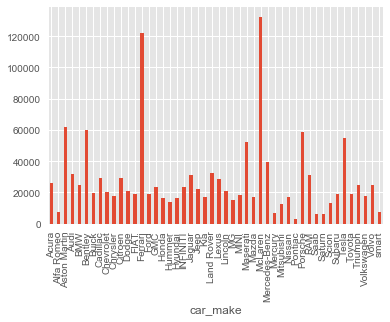

In [152]:
Data_clean.groupby('car_make').car_price.mean().plot(kind='bar')


In [153]:
Data_clean.to_csv('cardotcom_mugging.csv')

In [154]:
pwd Data

'C:\\Users\\emmat\\desktop\\Predictive_used_car_price'